<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/Project-6/%20SP_Project6_Images_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition


- How can machine learning be trained to identify whether the animals in the images are cats or dogs?
- This project will classify new, unseen images of cats and dogs.

# Import

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
feature_pkl_url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

target_pkl_url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

test_img_url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
import urllib.request

In [ ]:
# The URL of the pickled file of features X
feature_pkl_url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
# The local path where the feature file will be saved as a downloaded file
local_filename_X = 'X.pickle'

# The URL of the pickled file of the target y
target_pkl_url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
# The local path where the feature file will be saved as a downloaded file
local_filename_y = 'y.pickle'


In [ ]:
#1 Download the file from the URL of X
urllib.request.urlretrieve(feature_pkl_url, local_filename_X)
print(f"File downloaded successfully to {local_filename_X}")


File downloaded successfully to X.pickle


In [ ]:
#1 Download the file from the URL of y
urllib.request.urlretrieve(target_pkl_url, local_filename_y)
print(f"File downloaded successfully to {local_filename_y}")

File downloaded successfully to y.pickle


In [ ]:
#2 Unpickle the downloaded file from the URL of X in the previous code cell
with open('X.pickle', 'rb') as file:
    feature_X = pickle.load(file)

In [ ]:
type(feature_X)

numpy.ndarray

In [ ]:
#2 Unpickle the downloaded file from the URL of y
with open('y.pickle', 'rb') as file:
    target_y = pickle.load(file)

In [ ]:
type(target_y)

list

In [ ]:
# Convert list to numpy array of the target_y
target_y_arr = np.array(target_y)
type(target_y_arr)

numpy.ndarray

In [ ]:
print(feature_X)

[[[[ 95]
   [ 94]
   [ 98]
   ...
   [170]
   [172]
   [171]]

  [[ 92]
   [ 91]
   [ 95]
   ...
   [170]
   [172]
   [171]]

  [[ 89]
   [ 91]
   [ 92]
   ...
   [165]
   [169]
   [169]]

  ...

  [[ 84]
   [ 76]
   [ 73]
   ...
   [135]
   [164]
   [154]]

  [[ 82]
   [ 79]
   [ 71]
   ...
   [142]
   [134]
   [153]]

  [[ 80]
   [ 85]
   [ 85]
   ...
   [151]
   [146]
   [138]]]


 [[[171]
   [154]
   [139]
   ...
   [185]
   [187]
   [188]]

  [[146]
   [140]
   [129]
   ...
   [187]
   [187]
   [188]]

  [[128]
   [132]
   [128]
   ...
   [186]
   [187]
   [188]]

  ...

  [[167]
   [168]
   [162]
   ...
   [191]
   [193]
   [182]]

  [[166]
   [164]
   [164]
   ...
   [197]
   [179]
   [196]]

  [[176]
   [168]
   [173]
   ...
   [197]
   [184]
   [198]]]


 [[[121]
   [116]
   [130]
   ...
   [ 99]
   [126]
   [ 61]]

  [[122]
   [124]
   [126]
   ...
   [121]
   [ 75]
   [ 33]]

  [[128]
   [127]
   [127]
   ...
   [ 99]
   [ 99]
   [ 88]]

  ...

  [[191]
   [192]
   [192]
   

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
feature_X_scaled = feature_X/225
type(feature_X_scaled)

numpy.ndarray

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



- Look at the shape of X and y. Ensure that X is 4 dimensional.

In [ ]:
# Look at the shape of X
feature_X_scaled.shape

(24946, 100, 100, 1)

In [ ]:
# Look at the shape of y
target_y_arr.shape

(24946,)

In [ ]:
feature_X_scaled
target_y_arr

array([0, 1, 1, ..., 1, 0, 1])

- Plot a few ( >5 ) of the images in X using plt.imshow().

Note: Since the feature_X_scaled array is grayscale with a channel dimension, the channel dimension needs to be removed before using plt.imshow().


  - The feature_X_scaled has a 4D shape (num_images, height, width, channels)

In [ ]:
# show the first 7 images in the features X (after scaling)
feature_X_show = np.random.randint(0, 24946, 7)
feature_X_show

array([15475, 14334,  1243, 19876, 19053,  4537, 21206])

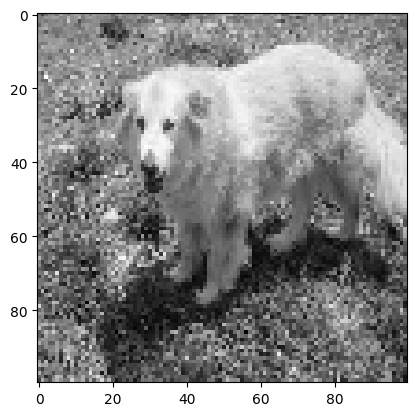

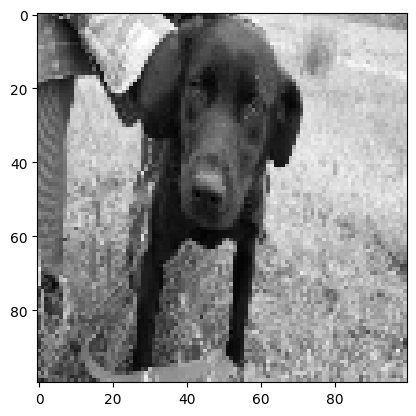

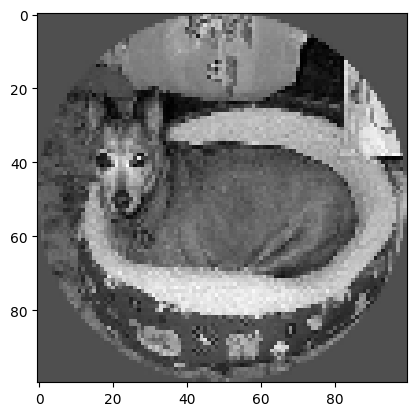

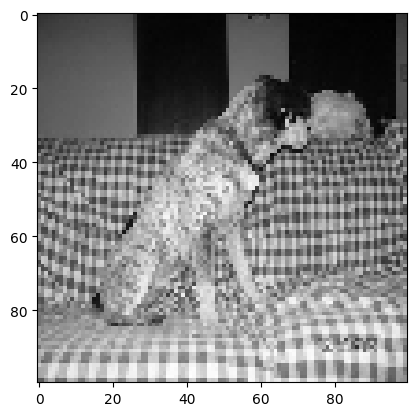

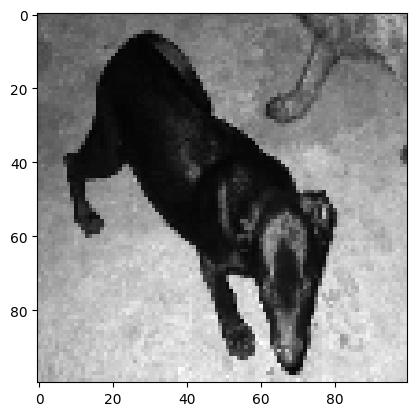

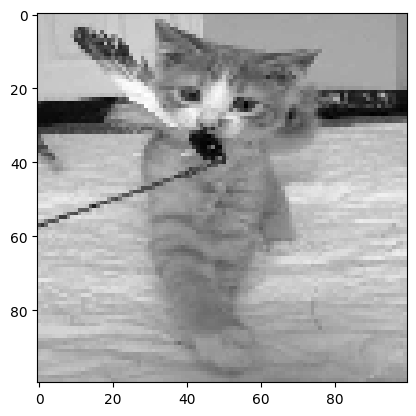

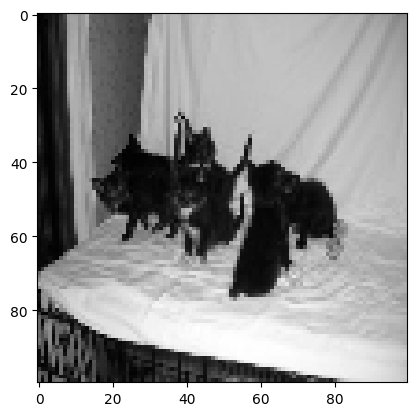

In [ ]:
for i in feature_X_show:
  plt.imshow(feature_X_scaled[i], cmap='gray')
  plt.show()

In [ ]:
# print target values
for i in feature_X_show:
  print(target_y_arr[i])

0
0
0
0
0
1
1


## Data Processing


- Split X and y into training and testing sets.

### Define Karas model

In [ ]:
# Assign the variables for train-test split
X = feature_X_scaled
y = target_y_arr

In [ ]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
X_train.shape

(19956, 100, 100, 1)

In [ ]:
X_test.shape

(4990, 100, 100, 1)

-  Build a convolutional neural network with the following:
  - Sequential layers
  - At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  - A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  - A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

In [ ]:
model = Sequential()

### Create sequential layers

In [ ]:
# Define input layer
model.add(
  Input(
    shape=X_train.shape[1:],
    name="model_input",
  ),
)

In [ ]:
# Define first hidden layer
model.add(
  Conv2D(
    name = "Conv1",
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

In [ ]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "Conv2",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


In [ ]:
# Define third hidden layer
model.add(
  Conv2D(
    name = "Conv3",
    filters = 128,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)


In [ ]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# the first Dense layer with 512 ReLU neurons acts as a "hidden" layer
# that learns high-level features from the flattened convolutional output.

model.add(
    Dense(512, activation='relu'))

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid',
  )
) # Sigmoid for binary classification (dog or not dog)

### Compile model

In [ ]:
# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)
print("CNN model built and compiled.")
model.summary()

CNN model built and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,297 (25.36 MB)

 Trainable params: 6,647,297 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Fit model
- Fit your model using the training set.

In [ ]:
# Fit model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 360s 572ms/step - accuracy: 0.5829 - loss: 0.6639
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 392s 588ms/step - accuracy: 0.7599 - loss: 0.4943
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 380s 586ms/step - accuracy: 0.8083 - loss: 0.4124
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 366s 586ms/step - accuracy: 0.8484 - loss: 0.3389
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 384s 590ms/step - accuracy: 0.8853 - loss: 0.2628
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 362s 581ms/step - accuracy: 0.9354 - loss: 0.1687
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 375s 570ms/step - accuracy: 0.9597 - loss: 0.1064
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 391s 585ms/step - accuracy: 0.9829 - loss: 0.0550
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 383s 587ms/step - accuracy: 0.9879 - loss: 0.0383
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 372s 571ms/step - accuracy: 0.9902 - loss: 0.0298


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,941,893 (76.07 MB)

 Trainable params: 6,647,297 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,294,596 (50.71 MB)

- Plot the distribution of probabilities for the testing set.

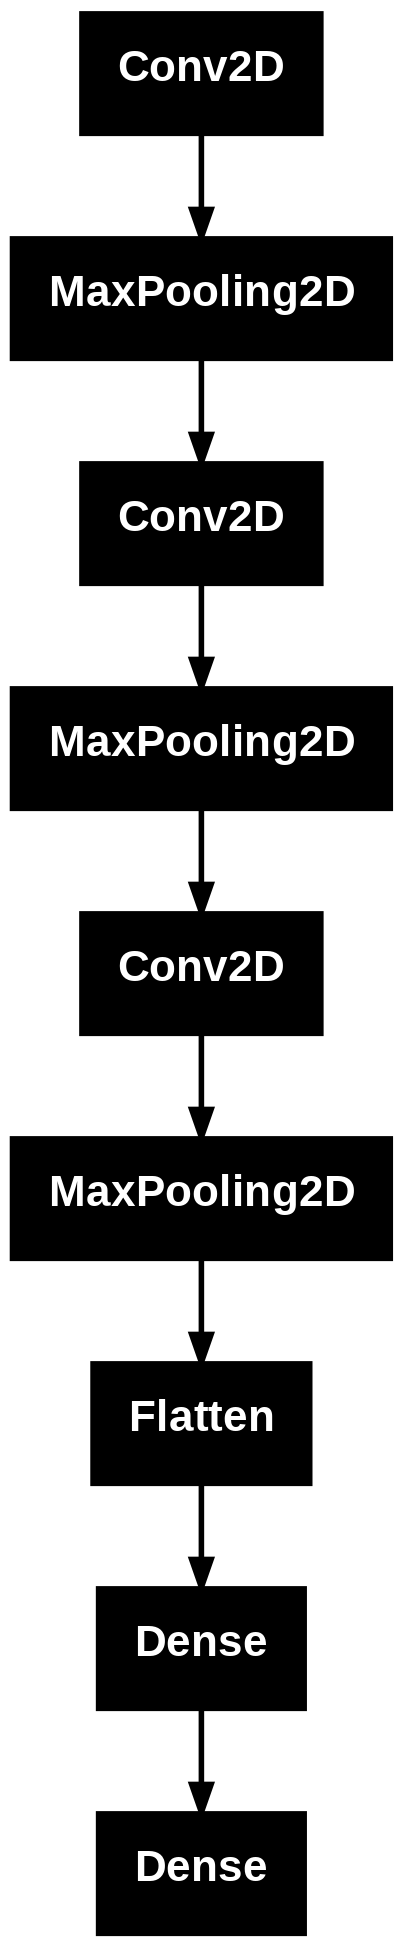

In [ ]:
plot_model(model)

### Evaluate model
- Evaluate your model using the testing set.

In [ ]:
# Evaluate model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.8332 - loss: 0.7186
0.7494810223579407
0.8216432929039001


156/156 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step


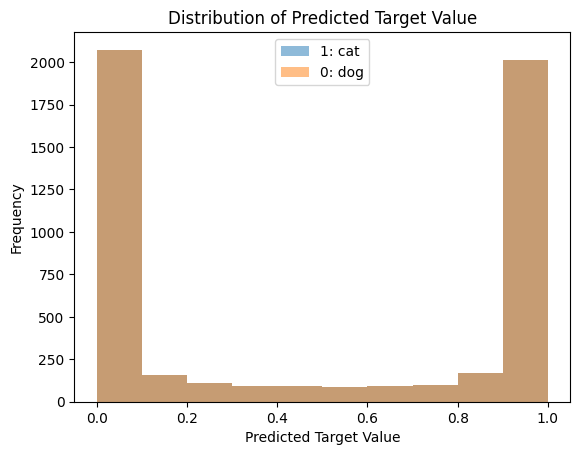

In [ ]:
# plot distribution of guesses
probs = model.predict(X_test)

plt.hist(probs, bins=10, alpha=0.5, label='1: cat')
plt.hist(probs, bins=10, alpha=0.5, label='0: dog')
plt.title("Distribution of Predicted Target Value")
plt.xlabel("Predicted Target Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Use model for image prediction

- Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

- Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

- Use the neural network you created to predict whether the image is a dog or a cat.

Step 1. Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )


- Pillow (PIL) is used for image operations (Image.open, Image.convert, Image.resize). This gives fine-grained control and is often more intuitive for basic image manipulations.

In [ ]:
# Install library using Pillow (PIL) for image manipulation
from PIL import Image
import io      # For handling image data from URL in memory
import requests

In [ ]:
# Assign a function to test the image prediction
def read_pic(path):
    """
    Given the file path or URL to an image, import it and convert it to a
    grayscale numpy array of 100x100 pixels with shape ((100,100,1)).
    Displays the image.
    """
    img_data = None

    # Check if the path is a URL
    if path.startswith('http://') or path.startswith('https://'):
        try:
            response = requests.get(path, stream=True)
            response.raise_for_status()  # Raise an exception for bad status codes
            img_data = io.BytesIO(response.content)
        except requests.exceptions.RequestException as e:
            print(f"Failed to download image from {path}: {e}")
            return None
    else:
        # Assume it's a local file path
        if not np.DataSource().exists(path): # This checks if the file exists locally
            print(f"Local file not found: {path}")
            return None
        img_data = path

    try:
        # Open image using Pillow
        img = Image.open(img_data)

        # Resize the image
        img = img.resize((100, 100), Image.Resampling.LANCZOS) # Use a high-quality resampling filter

        # Convert to grayscale
        img = img.convert('L') # 'L' mode for grayscale

        # Convert to numpy array
        img_array = np.array(img)

        # Ensure shape is (100, 100, 1)
        img_array = np.expand_dims(img_array, axis=-1)

        # For display, remove the last dimension
        img_display = np.squeeze(img_array)
        plt.imshow(img_display, cmap='gray') # Specify colormap for grayscale display
        plt.title("Displayed Image Test")
        plt.axis('off') # Hide axes for cleaner display
        plt.show()

        # Add batch dimension for model input
        img_array = np.expand_dims(img_array, axis=0) # Shape (1, 100, 100, 1)

        return img_array

    except Exception as e:
        print(f"Error processing image: {e}")
        return None

Step 2: Use the function defined above to read in the dog.jpg image from the provided URL

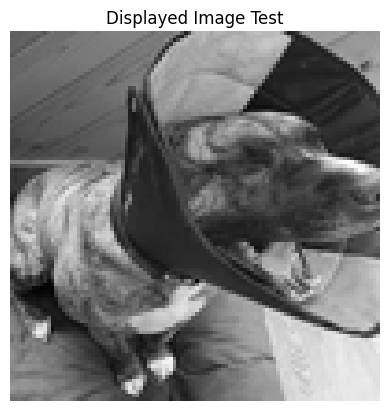

array([[[[103],
         [102],
         [101],
         ...,
         [152],
         [154],
         [155]],

        [[ 98],
         [100],
         [101],
         ...,
         [153],
         [154],
         [157]],

        [[102],
         [102],
         [103],
         ...,
         [157],
         [154],
         [159]],

        ...,

        [[144],
         [140],
         [134],
         ...,
         [229],
         [226],
         [227]],

        [[124],
         [125],
         [127],
         ...,
         [231],
         [228],
         [228]],

        [[113],
         [113],
         [120],
         ...,
         [233],
         [230],
         [230]]]], dtype=uint8)

In [ ]:
# call in the dog image for testing
dog_image_test = read_pic('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg')
dog_image_test

In [ ]:
# feed image to model
# # make predictions based on testing set and get predicted value
prediction = model.predict(dog_image_test)
print(f' {prediction} is the predicted target value. (0 = dog, 1 = cat)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
 [[0.]] is the predicted target value. (0 = dog, 1 = cat)


In [ ]:
prediction.shape

(1, 1)

## Communication of Results


## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.